In [1]:
include("../src/Autoencoder.jl")
using Flux.Data.MNIST
using Base.Iterators: partition
using Juno: @progress

In [2]:
#Data and parameters preparation
imgs = MNIST.images();

# Partition into batches of size 1000
data = [float(hcat(vec.(imgs)...)) for imgs in partition(imgs, 1000)];
N = 32; # Size of the encoding

In [3]:
autoencoder = AutoEncoder(28^2,N)
train(autoencoder,data)

┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.10394578506264031 (tracked)
loss(data[1]) = 0.07545710080408159 (tracked)
loss(data[1]) = 0.066228029399971 (tracked)


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.0578650680477604 (tracked)
loss(data[1]) = 0.051756561069762654 (tracked)
loss(data[1]) = 0.04546214559182143 (tracked)


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.0396297980219983 (tracked)
loss(data[1]) = 0.03539892706126314 (tracked)


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.03285174601450861 (tracked)
loss(data[1]) = 0.030493184002692412 (tracked)
loss(data[1]) = 0.028347504948189085 (tracked)


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.026720230606774673 (tracked)
loss(data[1]) = 0.02555692074086339 (tracked)


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.024547495543508237 (tracked)
loss(data[1]) = 0.02342025179960362 (tracked)


┌ Info: Epoch 7
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.022473716421054613 (tracked)
loss(data[1]) = 0.021853518562966898 (tracked)
loss(data[1]) = 0.02114449970810501 (tracked)


┌ Info: Epoch 8
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.0204555414912089 (tracked)
loss(data[1]) = 0.019856783419760306 (tracked)


┌ Info: Epoch 9
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.019270484273602864 (tracked)
loss(data[1]) = 0.018915604935227214 (tracked)
loss(data[1]) = 0.018510500968646523 (tracked)


┌ Info: Epoch 10
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.018075897251132383 (tracked)
loss(data[1]) = 0.01784353451684753 (tracked)


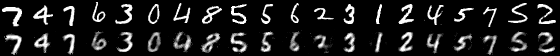

In [4]:
# Sample output
using Images

img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

function sample()
  # 20 random digits
  before = [imgs[i] for i in rand(1:length(imgs), 20)]
  # Before and after images
  after = img.(map(x -> cpu(autoencoder._model)(float(vec(x))).data, before))
  # Stack them all together
  hcat(vcat.(before, after)...)
end


sample()